<div style="text-align:center">
    <h1>
        On-policy Monte Carlo Control
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to implement one of the two major strategies that exist when learning a policy by interacting with the environment, called on-policy learning. The agent will perform the task from start to finish and based on the sample experience generated, update its estimates of the q-values of each state-action pair $Q(s,a)$.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 4 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

c:\Users\ramsi\anaconda3\envs\bmrl\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')


## Initialize the environment

In [2]:
env = Maze()

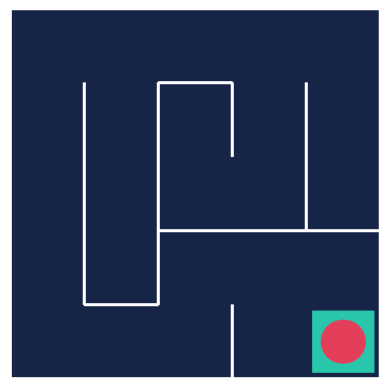

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [5]:
action_values = np.zeros((5,5,4))

#### Plot $Q(s, a)$

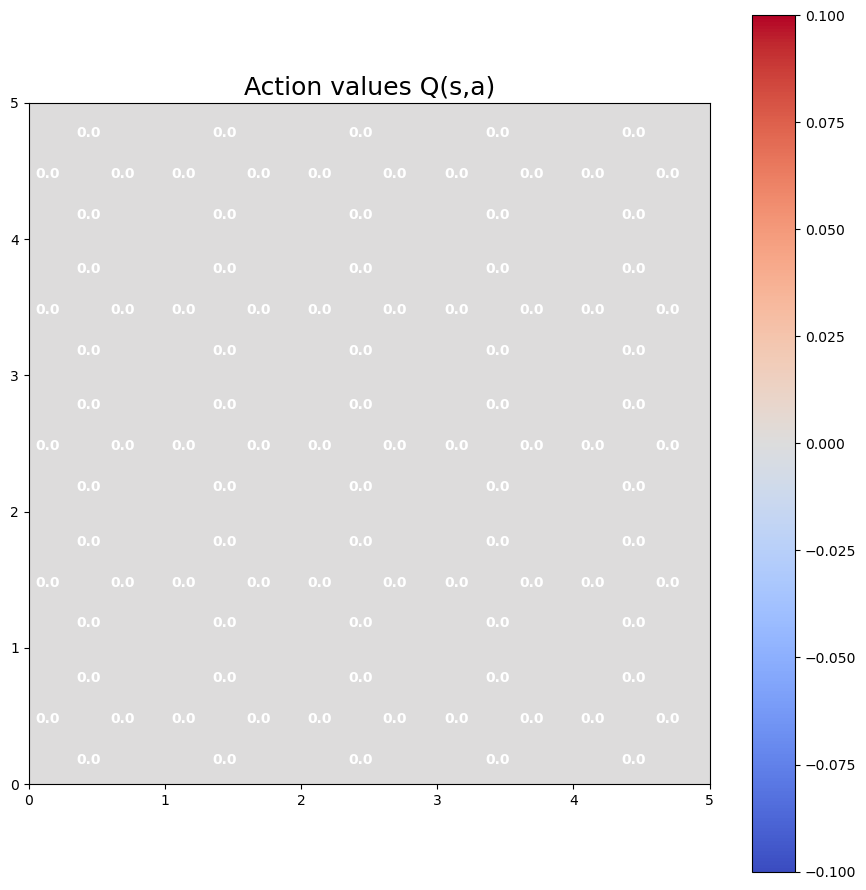

In [6]:
plot_action_values(action_values)

## Define the policy $\pi(s)$

#### Create the policy $\pi(s)$

In [7]:
def policy(state, epsilon = 0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av==av.max()))

#### Test the policy with state (0, 0)

In [24]:
action = policy((0,0), epsilon=0.5)
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


#### Plot the policy

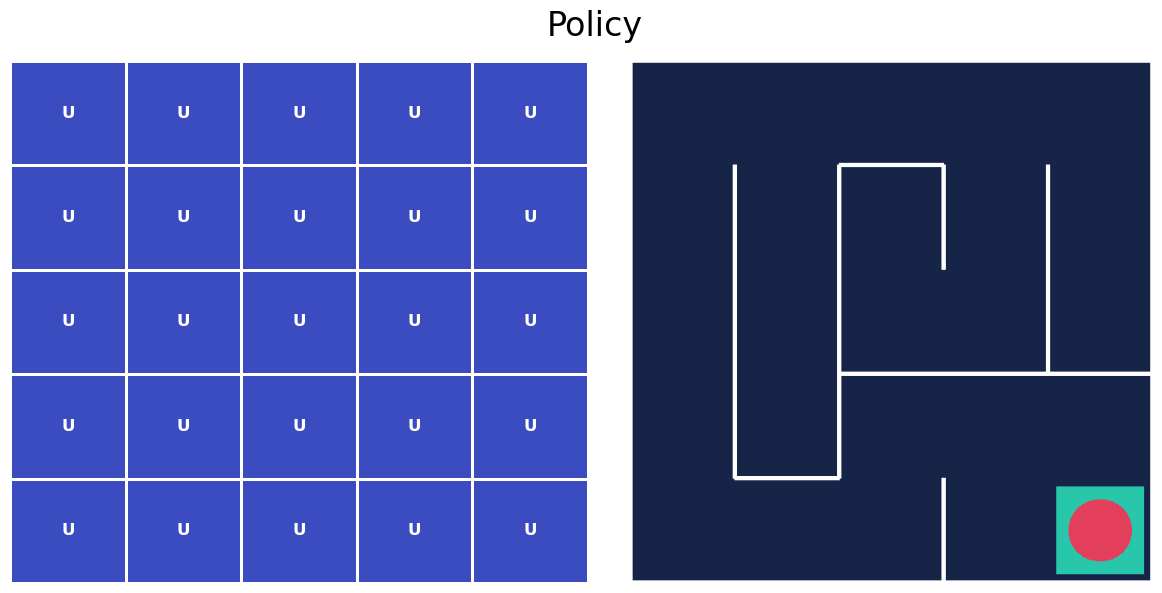

In [25]:
plot_policy(action_values, frame)

## Implement the algorithm
</br></br></br>

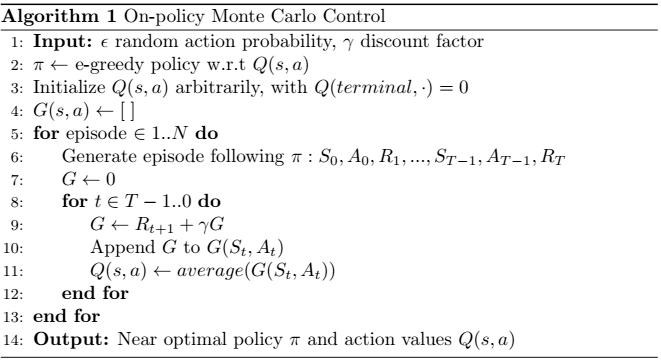


<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [26]:
def on_policy_mc_control(policy,
                         action_values,
                         episodes,
                         gamma=0.99,
                         epsilon=0.2):
    
    sa_returns = {}

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        G = 0

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G

            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [27]:
on_policy_mc_control(policy, action_values, episodes=10000)

## Show results

#### Show resulting value table $Q(s, a)$

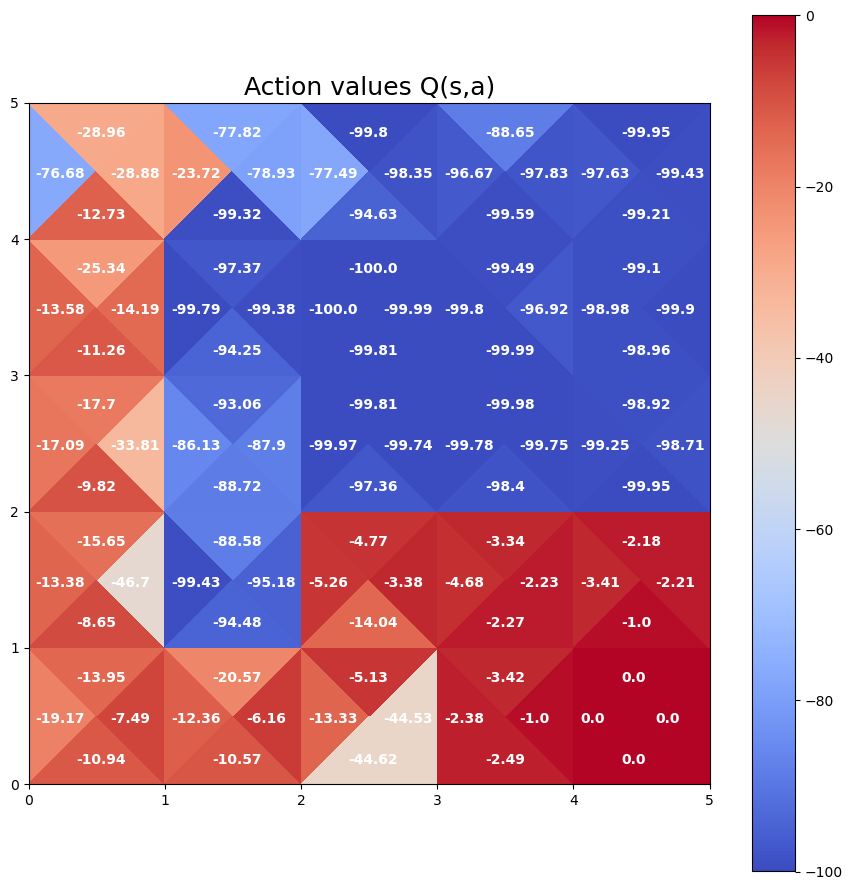

In [28]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

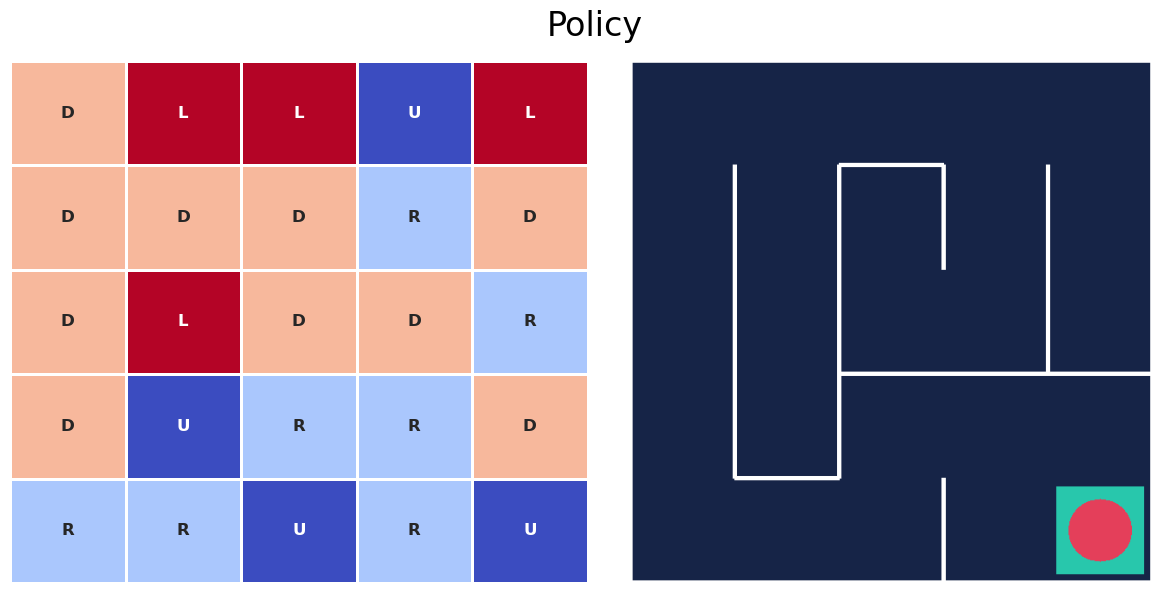

In [29]:
plot_policy(action_values, frame)

#### Test the resulting agent

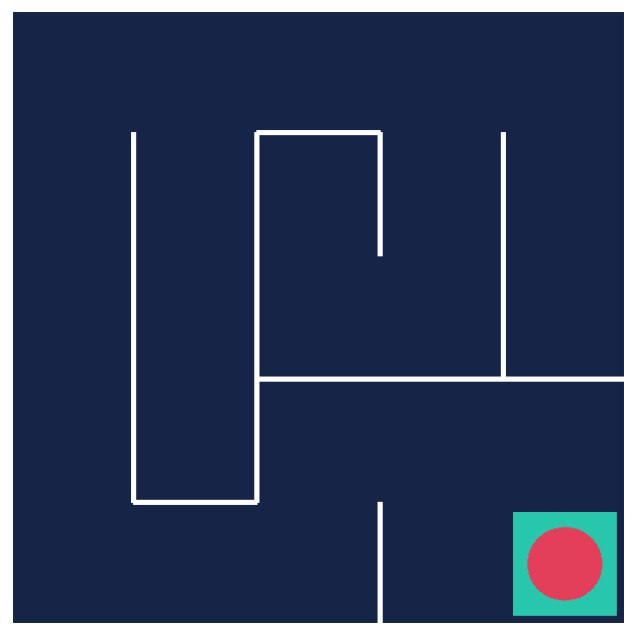

In [30]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)